# Events from CMS detector:

## $X \rightarrow \mu^+ \: \mu^-$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from pandas.tools.plotting import scatter_matrix
from scipy.optimize import curve_fit

#df = pd.read_csv('MuRun2010B-1.csv')
df = pd.read_csv('MuRun.csv')

df1 = df[df.Q1 == 1]
df1 = df1[df1.Q2 == -1]

df2 = df[df.Q1 == -1]
df2 = df2[df2.Q2 == 1]

frames = [df1, df2]

df = pd.concat(frames)

df = df[np.sqrt(df.px1**2 + df.py1**2) + np.sqrt(df.px2**2 + df.py2**2) > 50]

In [2]:
def poly(x, c1, c2, c3, c4):
    return c1*x*x*x + c2*x*x + c3*x + c4

def line(x, c1, c2):
    return c1*x + c2

def gaussian(x, mu, sig, const):
    return const * 1/(sig*np.sqrt(2*np.pi)) * np.exp(-(x - mu)**2 / 2*sig**2)

def gaus_poly(x, mu, sig, cont, c1, c2, c3, c4):
    return poly(x, c1, c2, c3, c4) + gaussian(x, mu, sig, cont)

def P_fac(Energy,Mass):
    m_mu = 0.105
    p = ((Energy**2.0/4.0)-m_mu**2.0)**(1.0/2.0)
    p0 = ((Mass**2.0/4.0)-m_mu**2.0)**(1.0/2.0)
    return (p/p0)**3.0

def BW_2(Energy,Mass,Gamma):
    g = ((Mass**2.0 + Gamma*P_fac(Energy,Mass)**2.0)*Mass**2.0)**(1.0/2.0)
    k = (2.0 * 2.0**(1.0/2.0) * Mass * Gamma*P_fac(Energy,Mass) * g)/(np.pi * (Mass**(2.0)+g)**(1.0/2.0))
    return (k/((Energy**2.0-Mass**2.0)**2.0 + (Gamma*P_fac(Energy,Mass)*Mass)**2.0))

def BW(Energy,Mass,Gamma):
    g = ((Mass**2.0 + Gamma**2.0)*Mass**2.0)**(1.0/2.0)
    k = (2.0 * 2.0**(1.0/2.0) * Mass * Gamma * g)/(np.pi * (Mass**(2.0)+g)**(1.0/2.0))
    return (k/((Energy**2.0-Mass**2.0)**2.0 + (Gamma*Mass)**2.0))

def BW_poly(x, Mass, Gamma, c1, c2, c3, c4):
    return poly(x, c1, c2, c3, c4) + BW(x, Mass, Gamma)

def chi_2(ys,yknown):
    total = 0
    for i in xrange(len(yknown)):
        temp = (ys[i]-yknown[i])**2.0
        if yknown[i] == 0:
            total += 1#temp
        else :
            total += temp/yknown[i]
    return total/len(yknown)

In [3]:
df.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
22,146436,91168213,G,167.7820,39.0091,-30.55090,160.29900,49.5486,1.890310,-0.664396,...,T,3.14872,-0.426839,-1.08415,2.92331,1.16515,1.650550,-1.945870,-1,9.29907
38,146436,91602896,G,42.2877,17.6286,37.92250,6.27366,41.8196,0.149460,1.135650,...,G,43.25110,-18.026100,-38.78690,-6.42546,42.77100,-0.149670,-2.005850,-1,85.53340
84,146436,92391568,G,31.2122,-24.6531,-16.72060,9.31861,29.7885,0.307936,-2.545620,...,G,31.05810,24.533400,16.63070,-9.28055,29.63890,-0.308217,0.595724,-1,62.27010
89,146436,92390210,G,35.8456,-34.7452,-5.69783,6.72308,35.2093,0.189804,-2.979050,...,T,35.55500,34.244300,5.60492,-7.74994,34.70000,-0.221525,0.162236,-1,71.39140
309,146514,147013855,G,39.5694,-25.6909,-28.57110,9.45495,38.4230,0.243657,-2.303160,...,T,38.58300,24.921500,27.67640,-10.07830,37.24330,-0.267409,0.837729,-1,78.14100


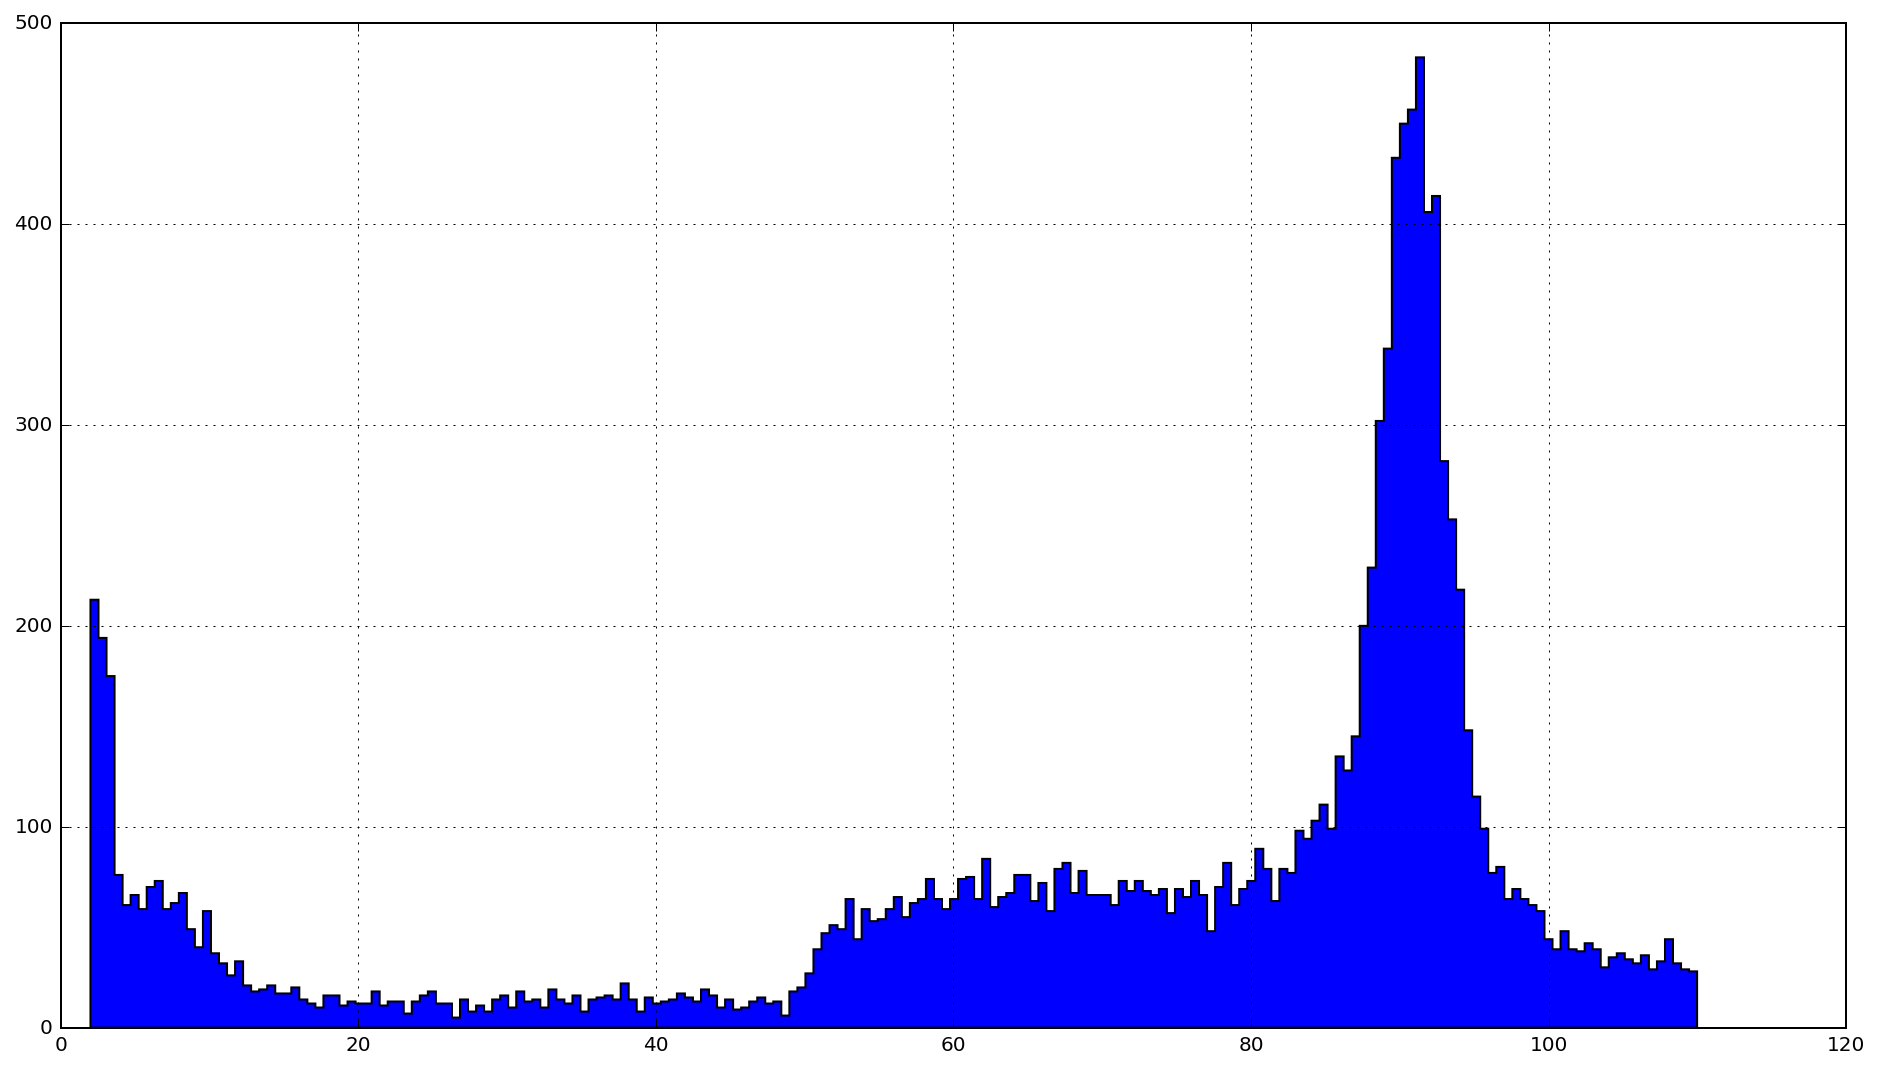

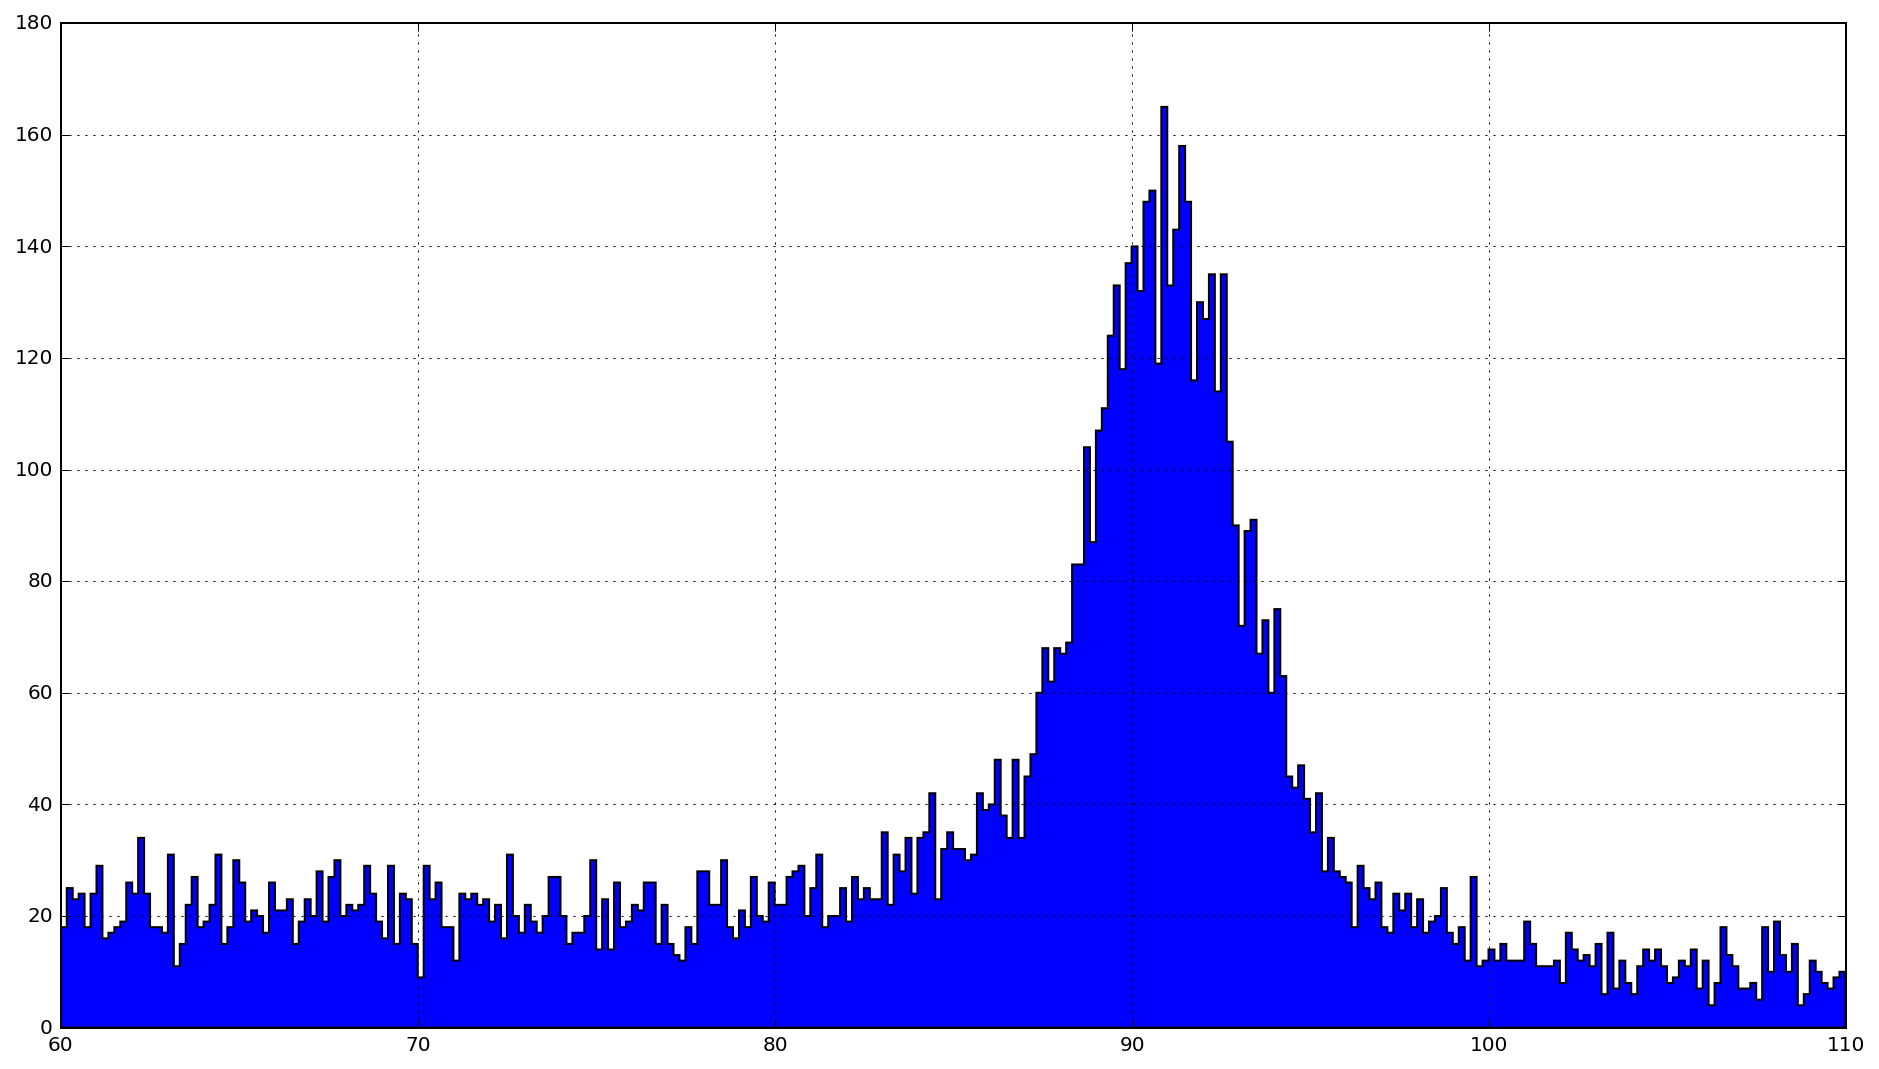

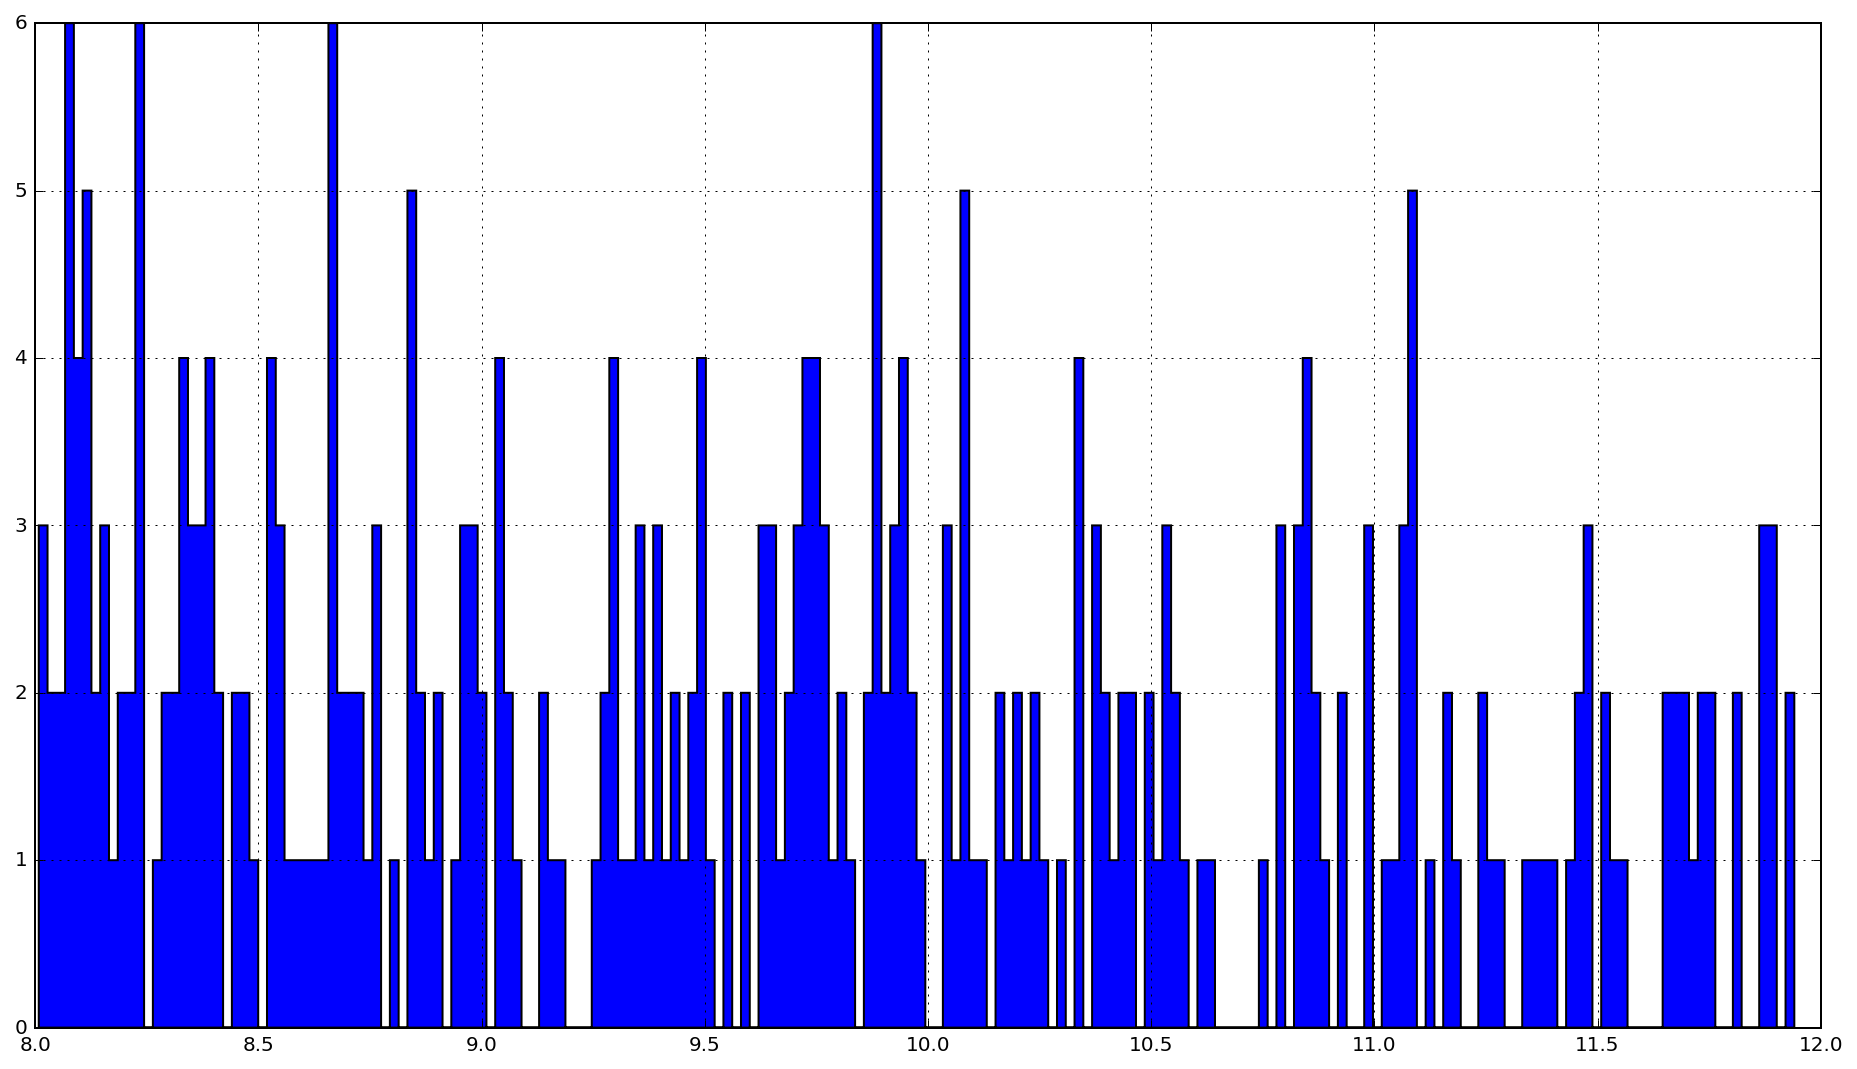

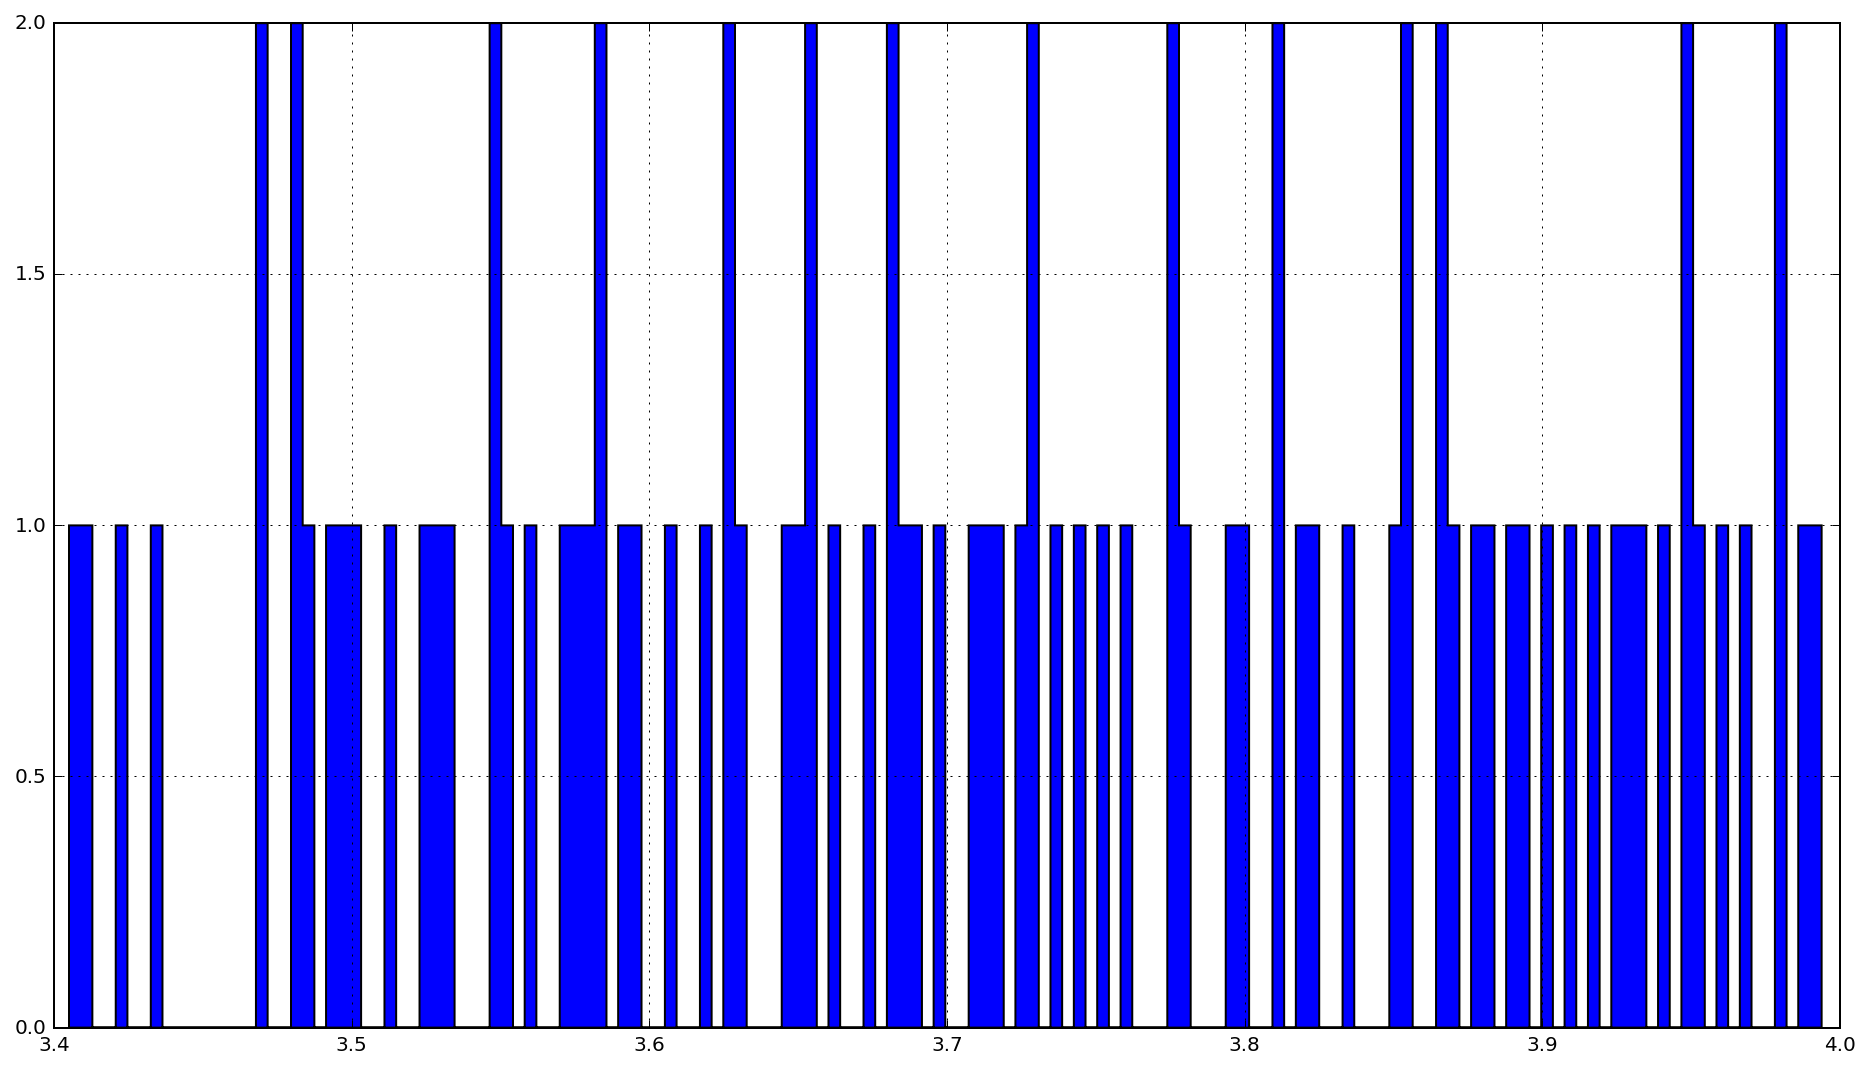

In [4]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df.M.hist(bins=200,histtype=u'stepfilled')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df[df.M > 60].M.hist(bins=300,histtype=u'stepfilled')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
other = df[df.M < 12]
other = other[other.M > 8]
other.M.hist(bins=200,histtype=u'stepfilled')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
other = df[df.M < 4]
other = other[other.M > 3.4]
other.M.hist(bins=150,histtype=u'stepfilled')
plt.show()

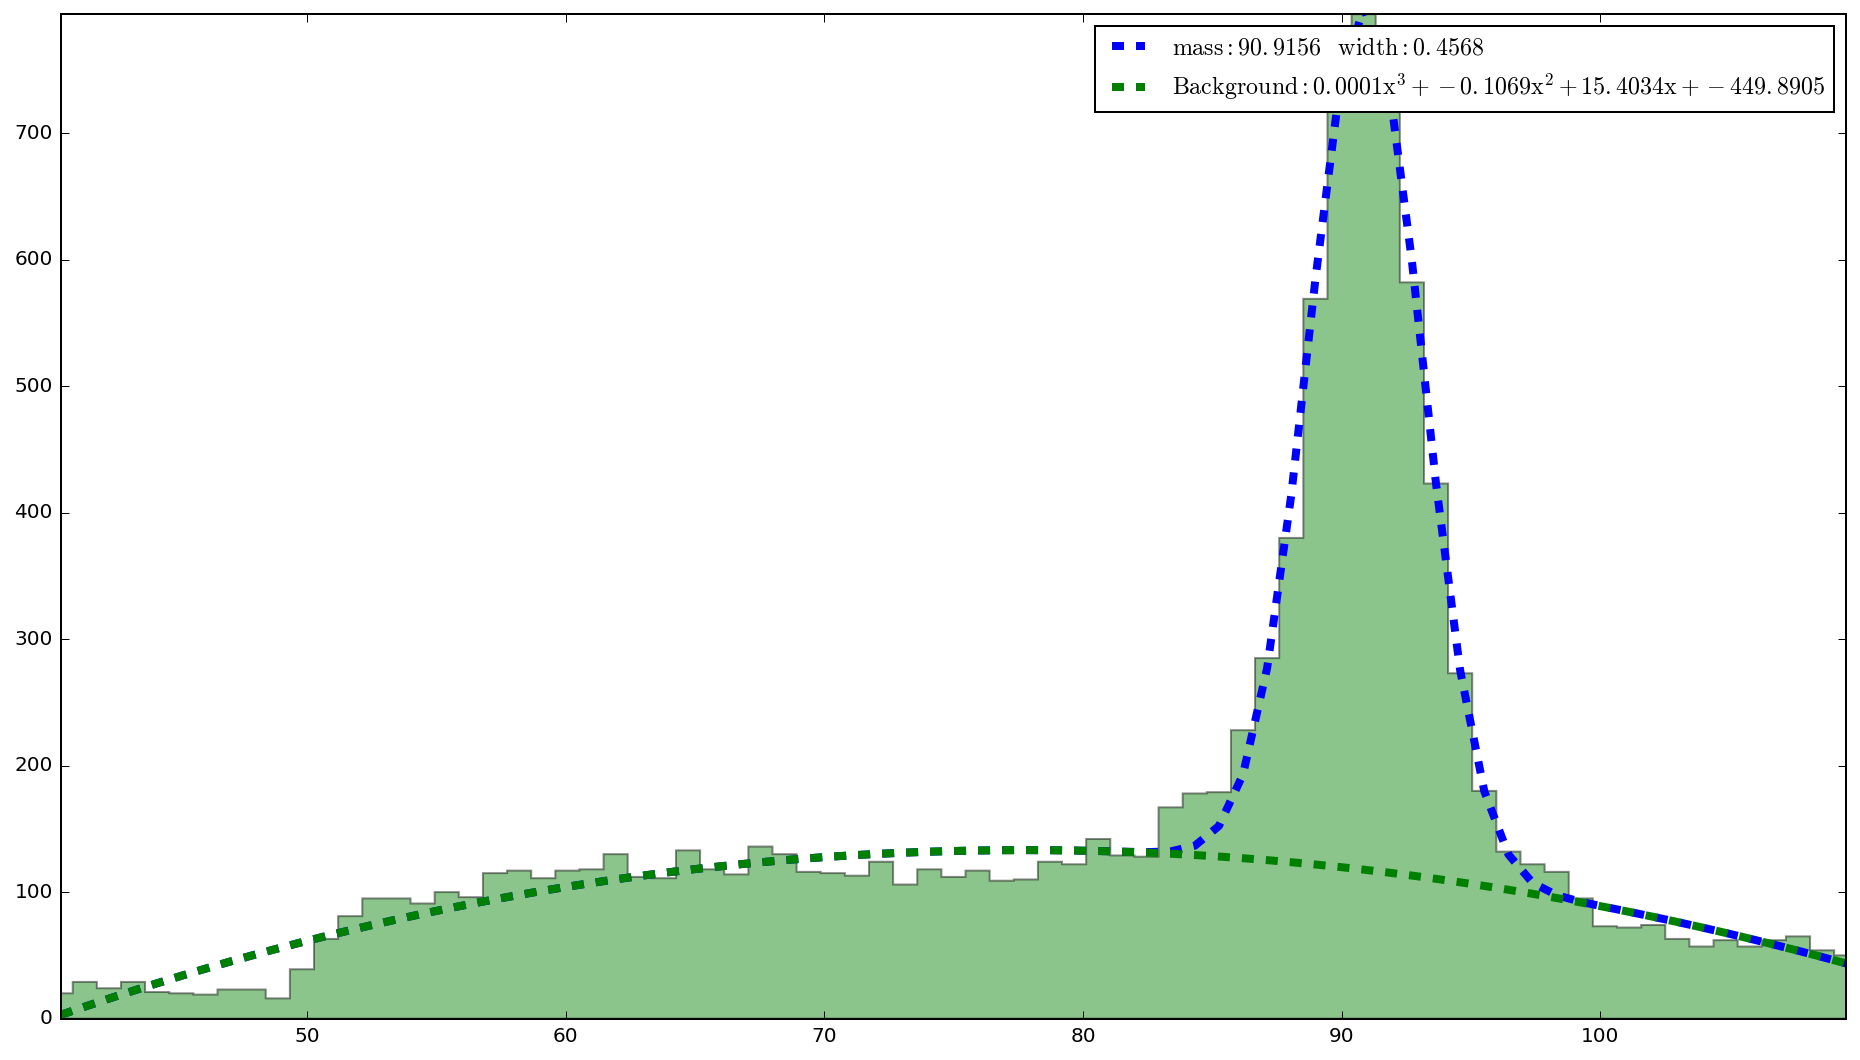

In [5]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = df[df.M > 40].M

num_bins = 75

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist


popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

x0 = np.array([91,1,1,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(gaus_poly, xdata, ydata,p0=x0)

plt.plot(xdata,gaus_poly(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,poly(xdata,popt_1[3],popt_1[4],popt_1[5],popt_1[6]),'g--', lw=4, 
    label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[3],popt_1[4],popt_1[5],popt_1[6]))

plt.ylim((0,np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [6]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
maxs = mean + 3*sigma
mins = mean - 3*sigma
Zs = df[df.M < maxs]
Zs = Zs[Zs.M > mins]

#Zs.describe()
#ax = scatter_matrix(Zs, alpha=0.2, figsize=(20, 15),diagonal='kde')

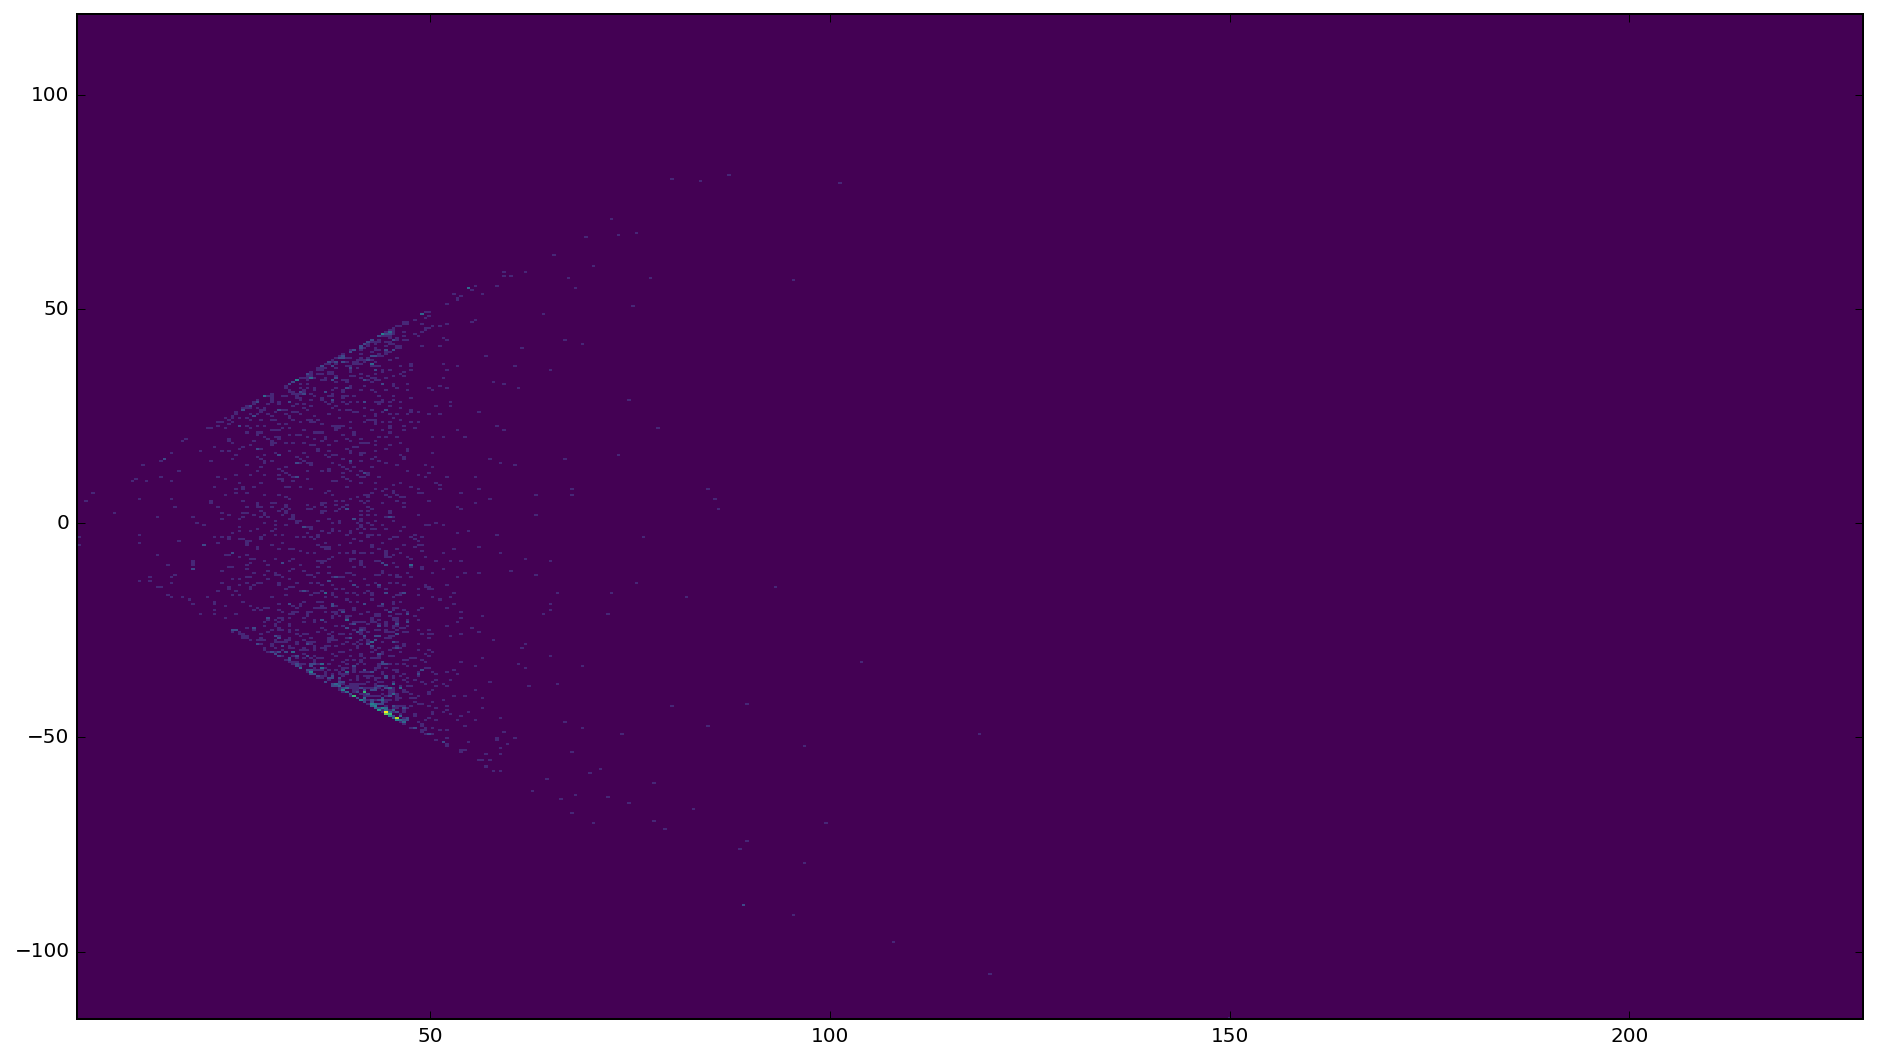

In [7]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(Zs.pt1,Zs.py1,bins=500,cmap='viridis')
plt.show()

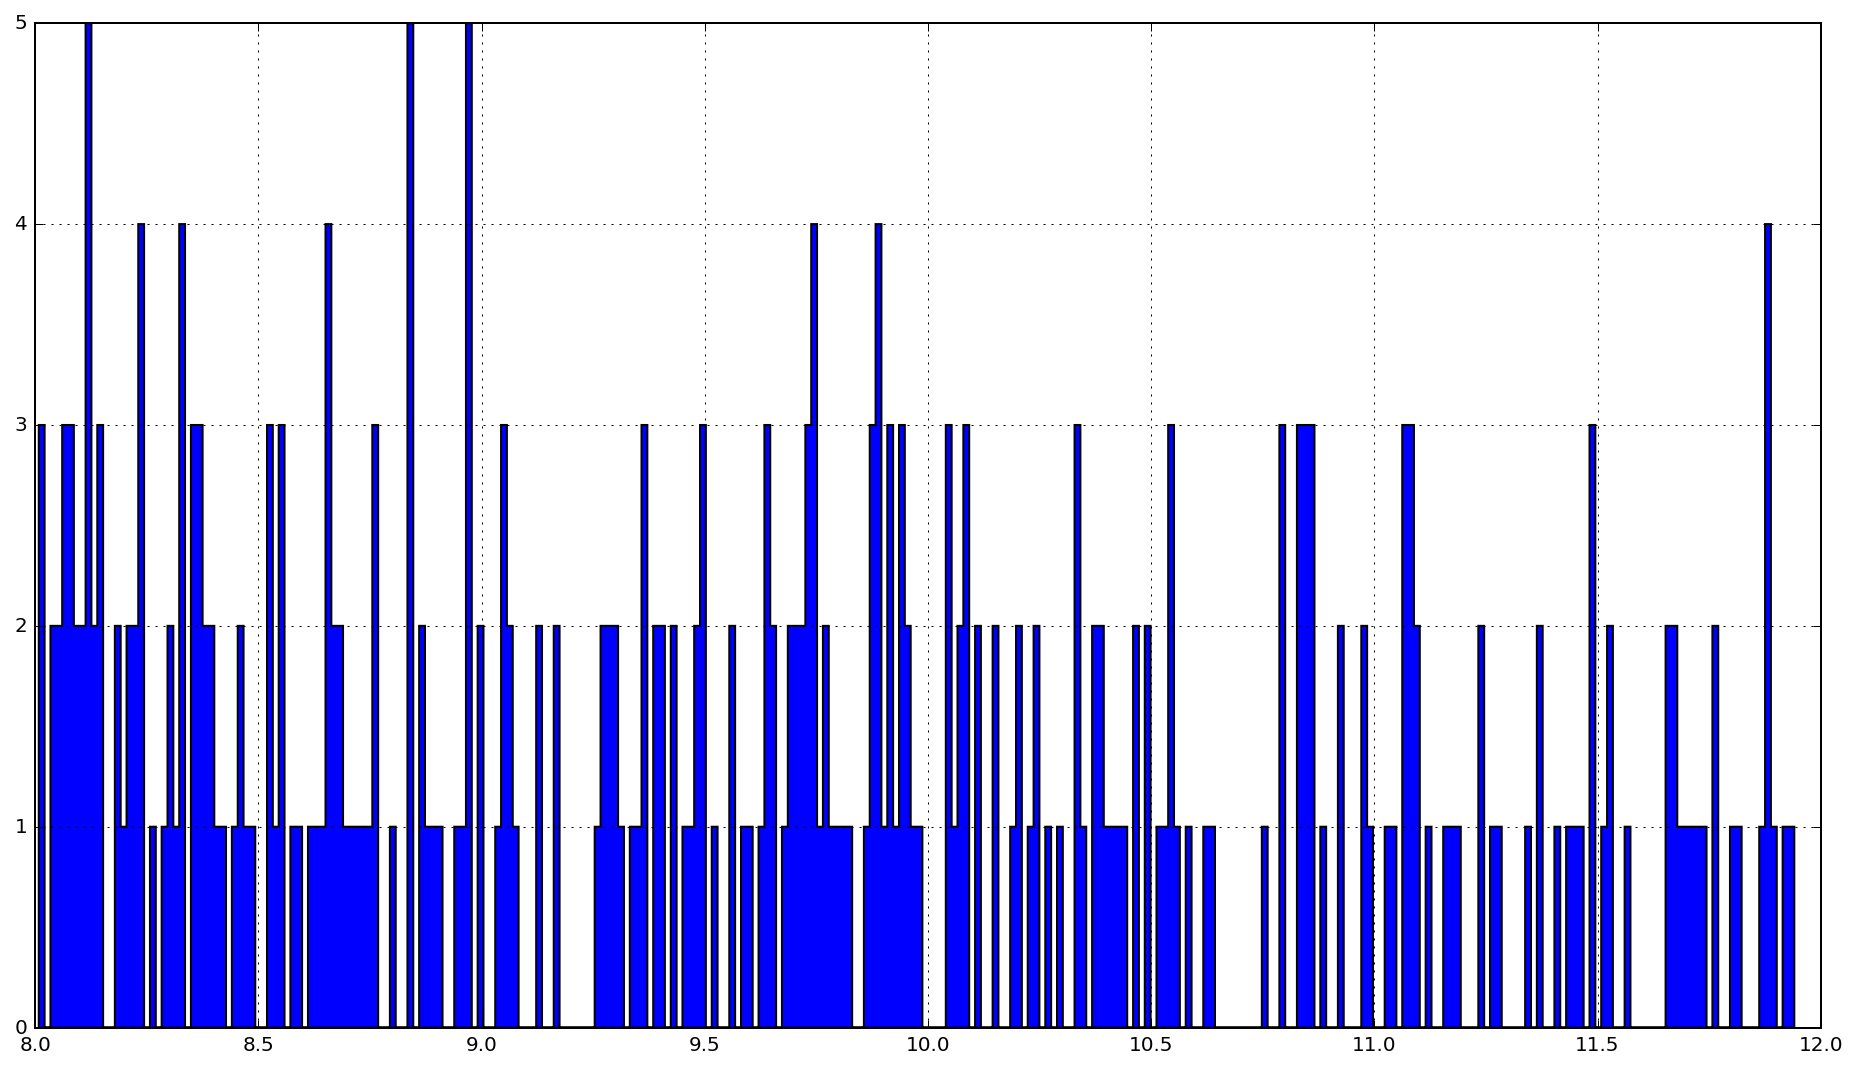

In [8]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
upsilon = df[df.M < 12]
upsilon = upsilon[upsilon.M > 8]
upsilon.M.hist(bins=300,histtype=u'stepfilled')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

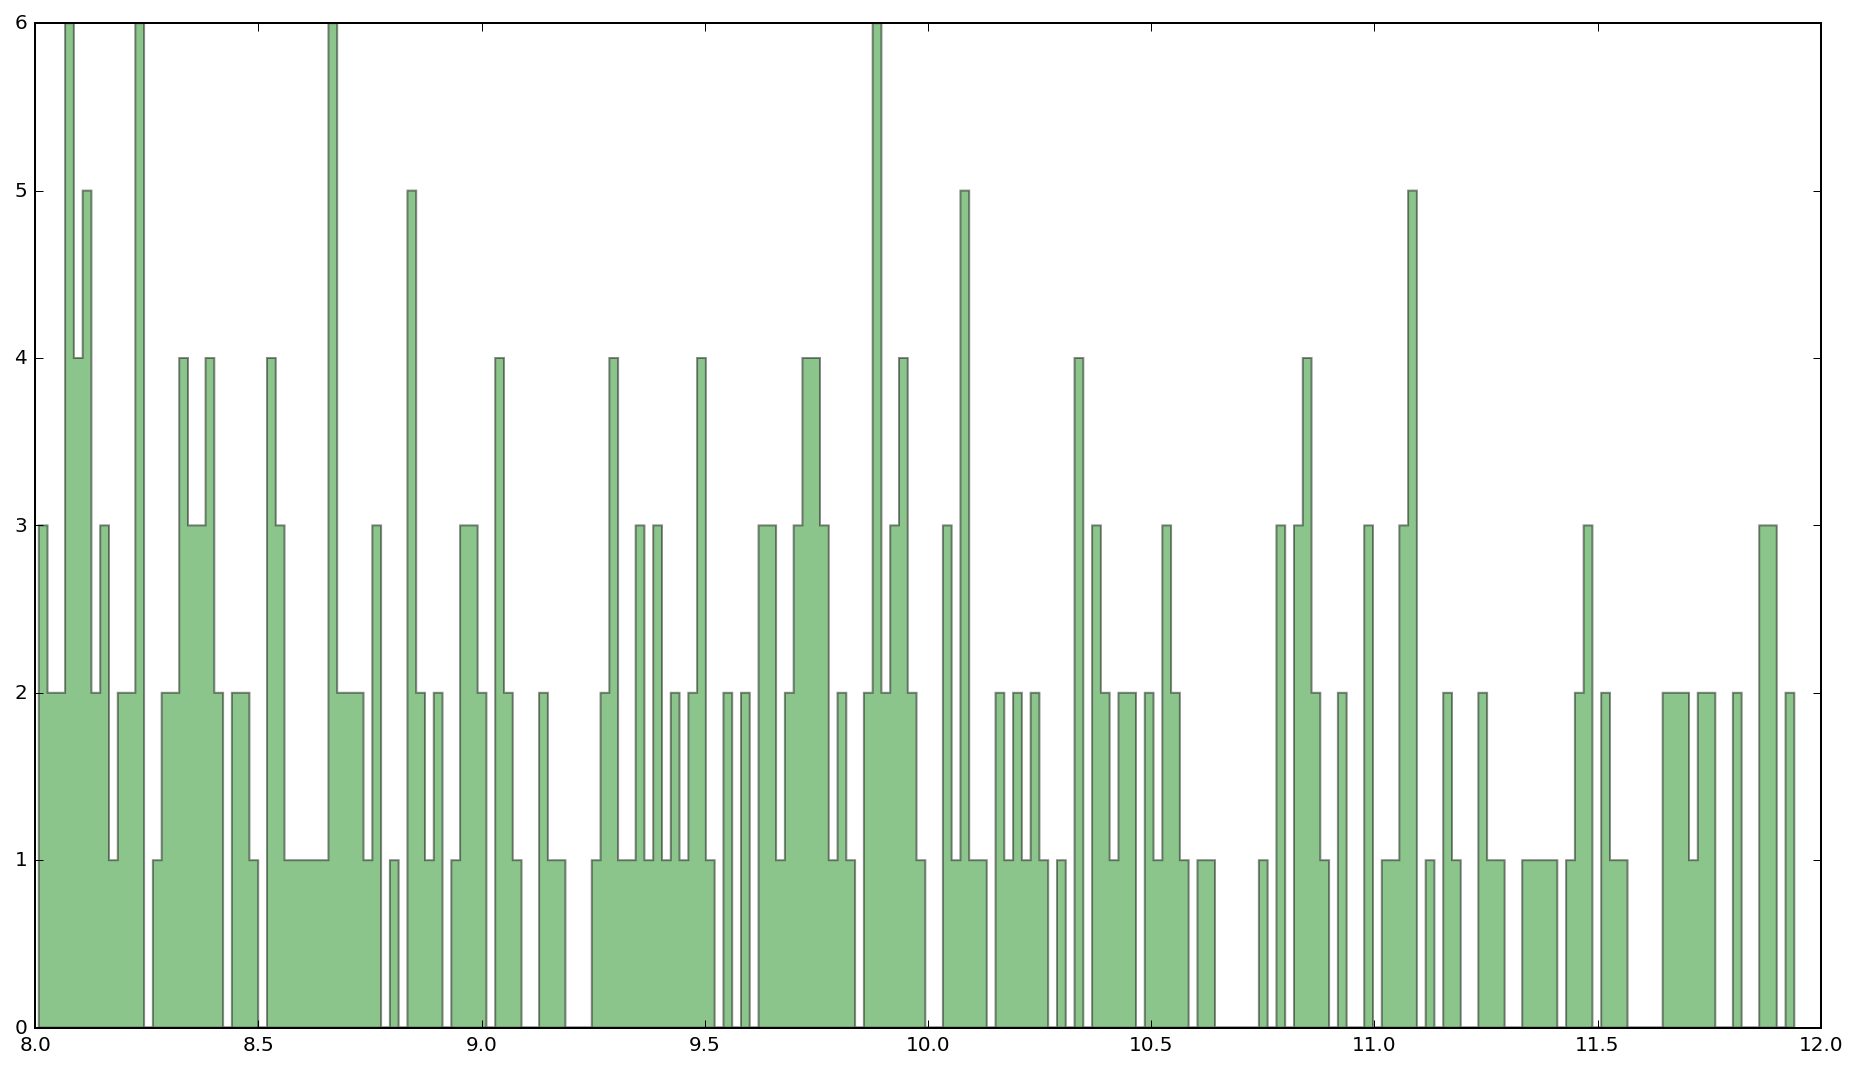

In [9]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = upsilon.M

num_bins = 200

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist


popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

x0 = np.array([9.45,10.7,1,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(gaus_poly, xdata, ydata,p0=x0)

plt.plot(xdata,gaus_poly(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,poly(xdata,*popt_1[3:]),'g--', lw=4, 
    label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[3],popt_1[4],popt_1[5],popt_1[6]))

plt.ylim((0,np.max(ydata)+0.05*np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
#fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
maxs = mean + 0.1
mins = mean - 0.1
upsilon = df[df.M < maxs]
upsilon = upsilon[upsilon.M > mins]

#fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
#plt.hist(upsilon.M,bins=10,histtype=u'stepfilled')
plt.show()
#Zs.describe()
#ax = scatter_matrix(upsilon, alpha=0.2, figsize=(20, 15),diagonal='kde')

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(upsilon[upsilon.pt1 < 40].pt1,upsilon[upsilon.pt1 < 40].py1,bins=500,cmap='viridis')
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = df[df.M > 40].M

num_bins = 500

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist


popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

x0 = np.array([91,0.04,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(BW_poly, xdata, ydata,p0=x0,maxfev = 14000)

plt.plot(xdata,BW_poly(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,poly(xdata,*popt_1[2:]),'g--', lw=4, 
    label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[2],popt_1[3],popt_1[4],popt_1[5]))

plt.ylim((0,np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = df[df.M > 40]
mass = mass[mass.M < 80].M

num_bins = 70

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist


popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

x0 = np.array([91,0.04,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(BW_poly, xdata, ydata,p0=x0,maxfev = 14000)

plt.plot(xdata,BW_poly(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,poly(xdata,*popt_1[2:]),'g--', lw=4, 
    label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[2],popt_1[3],popt_1[4],popt_1[5]))

plt.ylim((0,np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()
bck = [1,popt_1[3],popt_1[4],popt_1[5]]
bck = [popt_1[2],popt_1[3],popt_1[4],popt_1[5]]
#bck[0] = 0

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = df[df.M > 40].M

num_bins = 200

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist


popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

x0 = np.array([91,0.04,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(BW_poly, xdata, ydata,p0=x0,maxfev = 14000)

plt.plot(xdata,BW_poly(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,poly(xdata,*popt_1[2:]),'g--', lw=4, 
    label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[2],popt_1[3],popt_1[4],popt_1[5]))

plt.plot(xdata,poly(xdata,*bck),'k--', lw=4, 
    label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[2],popt_1[3],popt_1[4],popt_1[5]))


signal = []
for i in xrange(num_bins):
    temp = ydata[i] - poly(xdata[i],*popt_1[2:])
    if temp <= 0:
        temp = 0
    signal.append(temp)

signal_line = lambda x : BW_poly(x,*popt_1) - poly(x, *bck)
plt.scatter(xdata, signal,marker='o', color='r', label=r'$\mathrm{Signal \ points}$')

popt_1, pcov_1 = curve_fit(gaussian, xdata, signal, p0=[91,1,1],maxfev = 14000)

plt.plot(xdata,gaussian(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))


plt.ylim((0,np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = df[df.M > 4]
mass = mass[mass.M < 12].M

num_bins = 700

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist


popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

x0 = np.array([91,0.04,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(BW_poly, xdata, ydata,p0=x0,maxfev = 14000)

plt.plot(xdata,BW_poly(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,poly(xdata,*popt_1[2:]),'g--', lw=4, 
    label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[2],popt_1[3],popt_1[4],popt_1[5]))

plt.ylim((0,np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

bck = [popt_1[2],popt_1[3],popt_1[4],popt_1[5]]
#bck[0] = 0

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
upsilon = df[df.M < 12]
upsilon = upsilon[upsilon.M > 8]
mass = upsilon.M

num_bins = 400

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

popt_1, pcov_1 = curve_fit(poly, xdata, ydata)

x0 = np.array([9.45,10.7,1,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(gaus_poly, xdata, ydata,p0=x0)

plt.plot(xdata,gaus_poly(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

signal_line = lambda x : gaus_poly(x,*popt_1) - poly(x, *popt_1[3:])

signal = []
for i in xrange(num_bins):
    temp = ydata[i] - signal_line(xdata[i])
    if temp <= 0:
        temp = 0
    signal.append(temp)

#plt.scatter(xdata, signal,marker='o', color='r', label=r'$\mathrm{Signal \ points}$')

popt_1, pcov_1 = curve_fit(poly, xdata, signal)

x0 = np.array([9.45,10.7,1,popt_1[0],popt_1[1],popt_1[2],popt_1[3]])
popt_1, pcov_1 = curve_fit(gaus_poly, xdata, signal,p0=x0)

plt.plot(xdata,poly(xdata,*popt_1[3:]),'g--', lw=4)

signal = []
for i in xrange(num_bins):
    temp = ydata[i] - poly(xdata[i],*popt_1[3:])
    if temp <= 0:
        temp = 0
    signal.append(temp)

#plt.scatter(xdata, signal, marker='o', color='r', label=r'$\mathrm{Signal \ points}$')
up_signal = signal
plt.ylim((0,np.max(ydata)+0.05*np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
ydata = signal
plt.scatter(xdata,ydata,marker='o',color='g',label=r'$\mathrm{Signal \ points}$')

popt_1, pcov_1 = curve_fit(gaussian, xdata, ydata,p0=[9.45,12,1])

plt.plot(xdata,gaussian(xdata,*popt_1),'g-', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

signal1 = []
for i in xrange(num_bins):
    temp = ydata[i] - gaussian(xdata[i],*popt_1)
    if temp <= 0:
        temp = 0
    signal1.append(temp)
    
ydata = signal1
plt.scatter(xdata, signal1,marker='o', color='b', label=r'$\mathrm{Signal \ points}$')

popt_1, pcov_1 = curve_fit(gaussian, xdata, ydata, p0=[10,10.7,1],maxfev=8000)

plt.plot(xdata,gaussian(xdata,*popt_1),'b-', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))


plt.ylim((0,np.max(signal)+0.05*np.max(signal)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = df[df.M > 40].M

num_bins = 450

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist

def big_poly(x, c1, c2, c3, c4, c5, c6, c7, c8):
    return c8*x**7 + c7*x**6 + c6*x**5 + c5*x**4 + c4*x**3 + c3*x**2 + c2*x + c1

def big_poly_gaus(x, mu, sig, cont, c1, c2, c3, c4, c5, c6, c7, c8):
    return gaussian(x, mu, sig, cont) + big_poly(x, c1, c2, c3, c4, c5, c6, c7, c8)

popt_1, pcov_1 = curve_fit(big_poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

x0 = np.array([91,0.04,1,popt_1[0],popt_1[1],popt_1[2],popt_1[3],popt_1[4],popt_1[5],popt_1[6],popt_1[7]])
popt_1, pcov_1 = curve_fit(big_poly_gaus, xdata, ydata,p0=x0,maxfev = 200000)

plt.plot(xdata,big_poly_gaus(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,big_poly(xdata,*popt_1[3:]),'g--', lw=4)#, 
    #label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[2],popt_1[3],popt_1[4],popt_1[5]))
    
signal = []
for i in xrange(num_bins):
    temp = ydata[i] - big_poly(xdata[i],*popt_1[3:])
    if temp <= 0:
        temp = 0
    signal.append(temp)

#plt.scatter(xdata, signal,marker='o', color='b', label=r'$\mathrm{Signal \ points}$')

#popt_1, pcov_1 = curve_fit(BW_2, xdata, signal, p0=[popt_1[0],popt_1[1]],maxfev = 200000)

#plt.plot(xdata,BW_2(xdata,*popt_1),'r', lw=4,
#        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

#popt_1, pcov_1 = curve_fit(BW, xdata, signal, p0=[popt_1[0],popt_1[1]],maxfev = 200000)

#plt.plot(xdata,BW(xdata,*popt_1),'g', lw=4,
#        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

plt.ylim((0,np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
popt_1, pcov_1 = curve_fit(big_poly_gaus, xdata, ydata,p0=x0,maxfev = 200000)

signal = []
for i in xrange(num_bins):
    temp = ydata[i] - big_poly(xdata[i],*popt_1[3:])
    signal.append(temp)

plt.scatter(xdata, signal,marker='o', color='b', label=r'$\mathrm{Signal \ points}$')

popt_1, pcov_1 = curve_fit(gaussian, xdata, signal,p0=[91,1,1],maxfev = 200000)
plt.plot(xdata,gaussian(xdata,*popt_1),'r', lw=4,
    label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))


plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
df1 = df[df.Q1 == 1]
df1 = df1[df1.Q2 == -1]

df2 = df[df.Q1 == -1]
df2 = df2[df2.Q2 == 1]

frames = [df1, df2]

neutral_events = pd.concat(frames)

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
neutral_events.M.hist(bins=2000,histtype=u'stepfilled')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
neutral_events[neutral_events.M > 60].M.hist(bins=200,histtype=u'stepfilled')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
other = neutral_events[neutral_events.M < 12]
other = other[other.M > 8]
other.M.hist(bins=200,histtype=u'stepfilled')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
other = neutral_events[neutral_events.M < 4]
other = other[other.M > 3.4]
other.M.hist(bins=150,histtype=u'stepfilled')
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
mass = neutral_events[neutral_events.M > 60].M

num_bins = 150

hist, bin_edges = np.histogram(mass,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist

def big_poly(x, c1, c2, c3, c4, c5, c6, c7, c8):
    #c8*x**7 + c7*x**6 + c6*x**5 + c5*x**4 + c4*x**3 + c3*x**2 + c2*x + c1
    return c1 + c2*x + c3*x**2 + c4*x**3

def big_poly_gaus(x, mu, sig, cont, c1, c2, c3, c4, c5, c6, c7, c8):
    return gaussian(x, mu, sig, cont) + big_poly(x, c1, c2, c3, c4, c5, c6, c7, c8)

popt_1, pcov_1 = curve_fit(big_poly, xdata, ydata)

n, bins, patches = plt.hist(mass, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.45)

x0 = np.array([91,0.04,1,popt_1[0],popt_1[1],popt_1[2],popt_1[3],popt_1[4],popt_1[5],popt_1[6],popt_1[7]])
popt_1, pcov_1 = curve_fit(big_poly_gaus, xdata, ydata,p0=x0,maxfev = 200000)

plt.plot(xdata,big_poly_gaus(xdata,*popt_1),'b--', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

mean = popt_1[0]
sigma = popt_1[1]

plt.plot(xdata,big_poly(xdata,*popt_1[3:]),'g--', lw=4)#, 
    #label=r'$\mathrm{Background: %.4f x^3 + %.4f x^2 + %.4f x + %.4f}$' %(popt_1[2],popt_1[3],popt_1[4],popt_1[5]))
    
signal = []
for i in xrange(num_bins):
    temp = ydata[i] - big_poly(xdata[i],*popt_1[3:])
    if temp <= 0:
        temp = 0
    signal.append(temp)

plt.scatter(xdata, signal,marker='o', color='b', label=r'$\mathrm{Signal \ points}$')

popt_1, pcov_1 = curve_fit(BW_2, xdata, signal, p0=[popt_1[0],popt_1[1]],maxfev = 200000)

plt.plot(xdata,BW_2(xdata,*popt_1),'r', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

popt_1, pcov_1 = curve_fit(BW, xdata, signal, p0=[popt_1[0],popt_1[1]],maxfev = 200000)

plt.plot(xdata,BW(xdata,*popt_1),'g', lw=4,
        label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))

plt.ylim((0,np.max(ydata)))
plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()


fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
popt_1, pcov_1 = curve_fit(big_poly_gaus, xdata, ydata,p0=x0,maxfev = 200000)

signal = []
for i in xrange(num_bins):
    temp = ydata[i] - big_poly(xdata[i],*popt_1[3:])
    signal.append(temp)

plt.scatter(xdata, signal,marker='o', color='b', label=r'$\mathrm{Signal \ points}$')

popt_1, pcov_1 = curve_fit(gaussian, xdata, signal,p0=[91,1,1],maxfev = 200000)
plt.plot(xdata,gaussian(xdata,*popt_1),'r', lw=4,
    label=r'$\mathrm{mass: %.4f \: \: \: \: width: %.4f}$' %(popt_1[0],popt_1[1]))


plt.xlim((np.min(xdata),np.max(xdata)))
plt.legend()
plt.show()

In [ ]:
df1 = df[df.Q1 == -1]
df1 = df1[df1.Q2 == -1]
df2 = df[df.Q1 == 1]
df2 = df2[df2.Q2 == 1]
frames = [df1, df2]
charged = pd.concat(frames)

In [ ]:
temp = charged[np.abs(charged.pt1) < 5]
temp = temp[np.abs(temp.pt2) < 5]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(temp.px1,temp.px2,bins=500,cmap='viridis')

temp = neutral_events[np.abs(neutral_events.pt1) < 5]
temp = temp[np.abs(temp.pt2) < 5]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(temp.px1,temp.px2,bins=500,cmap='viridis')

temp = df[np.abs(df.pt1) < 5]
temp = temp[np.abs(temp.pt2) < 5]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(df.px1,df.px2,bins=500,cmap='viridis')

plt.show()

In [ ]:
temp = charged[np.abs(charged.E1) < 100]
temp = temp[np.abs(temp.E2) < 100]
temp = temp[abs(temp.pt1) < 40]
temp = temp[abs(temp.pt2) < 40]
temp = temp[abs(temp.pz1) < 40]
temp = temp[abs(temp.pz2) < 40]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(temp.px1,temp.px2,bins=500,cmap='viridis')

temp = neutral_events[np.abs(neutral_events.E1) < 100]
temp = temp[np.abs(temp.E2) < 100]
temp = temp[abs(temp.pt1) < 40]
temp = temp[abs(temp.pt2) < 40]
temp = temp[abs(temp.pz1) < 40]
temp = temp[abs(temp.pz2) < 40]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(temp.px1,temp.px2,bins=500,cmap='viridis')

temp = df[np.abs(df.E1) < 100]
temp = temp[np.abs(temp.E2) < 100]
temp = temp[abs(temp.pt1) < 40]
temp = temp[abs(temp.pt2) < 40]
temp = temp[abs(temp.pz1) < 40]
temp = temp[abs(temp.pz2) < 40]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(temp.px1,temp.px2,bins=500,cmap='viridis')

plt.show()

In [ ]:
temp = charged[np.abs(charged.E1) < 100]
temp = temp[np.abs(temp.E2) < 100]
temp = temp[abs(temp.pt1) < 40]
temp = temp[abs(temp.pt2) < 40]
temp = temp[abs(temp.pz1) < 40]
temp = temp[abs(temp.pz2) < 40]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
pts = np.append(temp.pt1,-temp.pt2)
pzs = np.append(temp.pz1,-temp.pz2)
plt.hist2d(pts,pzs,bins=1000,cmap='viridis')

temp = neutral_events[np.abs(neutral_events.E1) < 100]
temp = temp[np.abs(temp.E2) < 100]
temp = temp[abs(temp.pt1) < 40]
temp = temp[abs(temp.pt2) < 40]
temp = temp[abs(temp.pz1) < 40]
temp = temp[abs(temp.pz2) < 40]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
pts = np.append(temp.pt1,-temp.pt2)
pzs = np.append(temp.pz1,-temp.pz2)
plt.hist2d(pts,pzs,bins=1000,cmap='viridis')

temp = df[np.abs(df.E1) < 100]
temp = temp[np.abs(temp.E2) < 100]
temp = temp[abs(temp.pt1) < 40]
temp = temp[abs(temp.pt2) < 40]
temp = temp[abs(temp.pz1) < 40]
temp = temp[abs(temp.pz2) < 40]

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
pts = np.append(temp.pt1,temp.pt2)
pzs = np.append(temp.pz1,temp.pz2)
plt.hist2d(pts,pzs,bins=1000,cmap='viridis')

plt.show()